In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels
import seaborn as sns

In [2]:
sys.path.insert(0, os.path.split(os.path.abspath(""))[0])
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [3]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates
from statistics import Statistics as st
from data_engineering import PeriodicDataPreprocess, FeatureEngineering
from statistics import *
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
csv = pd.read_csv("140423_090623_2nd_circuit.csv")

In [5]:
refac = CsvRefactorer(csv)

In [6]:
ids = refac.ids
ids

array([299, 309, 315, 317, 319, 321, 325, 327, 406, 407, 408, 409, 460,
       461, 462, 463, 481])

In [7]:
dfs_list = refac.select_by_ids(ids)

In [8]:
dfs_list = refac.min_frac_groupby(5, * dfs_list)

In [9]:
df = refac.concat_dfs(dfs_list)

In [10]:
df = df.rename(columns=refac.ids_mapping())

In [11]:
time_periods = [
    ("2023-04-17","2023-04-21"), ("2023-05-02","2023-05-05"), ("2023-05-08","2023-05-12"),
    ("2023-05-15","2023-05-19"), ("2023-05-22","2023-05-26"), ("2023-05-29","2023-06-02"),
    ("2023-06-05","2023-06-09")
]

In [12]:
periods_df = refac.select_time_period(df, time_periods)

In [13]:
pdp = PeriodicDataPreprocess(periods_df.copy())

In [14]:
pdp.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)

{'2023-04-17 2023-04-21':                          T1aHE        P2      T1bHE      T2bHE      T2aHE  \
 Timestamp                                                                   
 2023-04-17 09:20:00  29.400000  0.010000  26.400000  21.600000  26.600000   
 2023-04-17 09:25:00  29.400000  0.010000  26.400000  21.600000  26.600000   
 2023-04-17 09:30:00  29.400000  0.010000  26.400000  21.600000  26.600000   
 2023-04-17 09:35:00  29.400000  0.010000  26.400000  21.600000  26.593750   
 2023-04-17 09:40:00  29.400000  0.010000  26.400000  21.600000  26.587500   
 ...                        ...       ...        ...        ...        ...   
 2023-04-21 15:35:00  29.589999  0.474000  31.860000  18.733333  22.170000   
 2023-04-21 15:40:00  27.405000  0.470000  29.255000  18.350000  21.205000   
 2023-04-21 15:45:00  25.590000  0.474000  27.130000  17.931579  20.340000   
 2023-04-21 15:50:00  24.210526  0.421429  25.527778  17.442105  19.252632   
 2023-04-21 15:55:00  23.900000  0.1288

In [15]:
pdp.sma_smoothing(10)


{'2023-04-17 2023-04-21':                          T1aHE        P2      T1bHE      T2bHE      T2aHE  \
 Timestamp                                                                   
 2023-04-17 09:20:00  29.400000  0.010000  26.388833  21.593834  26.596250   
 2023-04-17 09:25:00  29.400000  0.010000  26.386333  21.585084  26.596250   
 2023-04-17 09:30:00  29.400000  0.010000  26.382649  21.575084  26.596250   
 2023-04-17 09:35:00  29.400000  0.010000  26.378149  21.565084  26.595625   
 2023-04-17 09:40:00  29.400000  0.010000  26.371649  21.555084  26.594584   
 ...                        ...       ...        ...        ...        ...   
 2023-04-21 14:45:00  37.636735  0.470200  43.380029  19.753478  25.555125   
 2023-04-21 14:50:00  36.669265  0.470600  42.001029  19.555144  25.090458   
 2023-04-21 14:55:00  35.505390  0.470600  40.386529  19.346811  24.560370   
 2023-04-21 15:00:00  34.185640  0.471000  38.584529  19.123302  23.969370   
 2023-04-21 15:05:00  32.754817  0.4661

In [16]:

pdp.filter_by_zscore(column="Q2")
pdp.filter_by_zscore(column="dt1")
pdp.filter_by_zscore(column="dt2")

{'2023-04-17 2023-04-21':                          T1aHE      P2      T1bHE      T2bHE      T2aHE  \
 Timestamp                                                                 
 2023-04-17 21:10:00  40.964225  0.4778  46.954387  24.879543  30.420515   
 2023-04-17 21:15:00  41.086100  0.4778  47.191262  24.692300  30.339265   
 2023-04-17 21:20:00  41.206100  0.4776  47.430012  24.499947  30.251140   
 2023-04-17 21:25:00  41.311355  0.4778  47.617373  24.278697  30.142904   
 2023-04-17 21:30:00  41.344250  0.4776  47.708373  24.049947  29.997279   
 ...                        ...     ...        ...        ...        ...   
 2023-04-21 14:00:00  40.004485  0.4704  46.262096  22.051165  27.967454   
 2023-04-21 14:05:00  39.861985  0.4702  46.133346  21.815749  27.756792   
 2023-04-21 14:10:00  39.700735  0.4702  45.988346  21.563665  27.528262   
 2023-04-21 14:15:00  39.521360  0.4700  45.825221  21.298665  27.286314   
 2023-04-21 14:40:00  38.350735  0.4702  44.445500  19.957471  

In [17]:
pdp.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)

['p21', 'p22', 'p23', 'p24']


{'2023-04-17 2023-04-21':                          T1aHE      P2      T1bHE      T2bHE      T2aHE  \
 Timestamp                                                                 
 2023-04-17 21:10:00  40.964225  0.4778  46.954387  24.879543  30.420515   
 2023-04-17 21:15:00  41.086100  0.4778  47.191262  24.692300  30.339265   
 2023-04-17 21:20:00  41.206100  0.4776  47.430012  24.499947  30.251140   
 2023-04-17 21:25:00  41.311355  0.4778  47.617373  24.278697  30.142904   
 2023-04-17 21:30:00  41.344250  0.4776  47.708373  24.049947  29.997279   
 ...                        ...     ...        ...        ...        ...   
 2023-04-21 14:00:00  40.004485  0.4704  46.262096  22.051165  27.967454   
 2023-04-21 14:05:00  39.861985  0.4702  46.133346  21.815749  27.756792   
 2023-04-21 14:10:00  39.700735  0.4702  45.988346  21.563665  27.528262   
 2023-04-21 14:15:00  39.521360  0.4700  45.825221  21.298665  27.286314   
 2023-04-21 14:40:00  38.350735  0.4702  44.445500  19.957471  

In [18]:
# corrections to pumps2


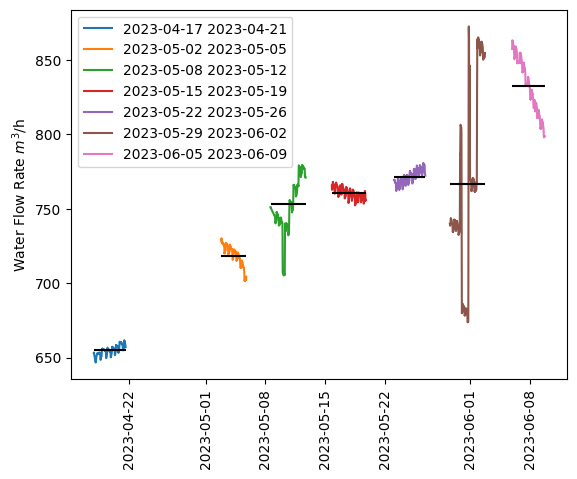

In [19]:
weeks = list(pdp.period_keys)
for i in weeks:
    plt.plot(pdp.period[i]["Q2"], label=i)
    plt.hlines(
        pdp.period[i]["Q2"].mean(),
        pdp.period[i]["Q2"].index[0],
        pdp.period[i]["Q2"].index[-1],
        color="black"
        
)
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

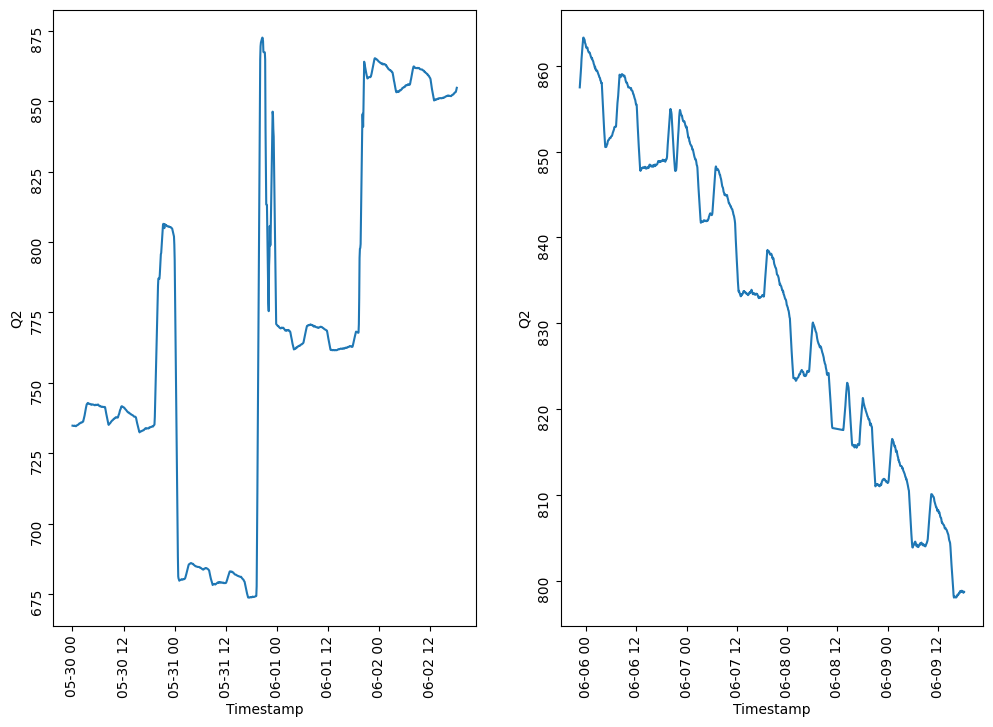

In [20]:
fig, axs = plt.subplots(1,2, figsize=(12,8))
sns.lineplot(pdp.period["2023-05-29 2023-06-02"].loc["2023-05-30": "2023-06-02","Q2"], ax=axs[0])
sns.lineplot(pdp.period["2023-06-05 2023-06-09"]["Q2"], ax=axs[1])

axs[0].tick_params(rotation=90)
axs[1].tick_params(rotation=90)

In [21]:
df = pdp.to_dataframe()

In [22]:
df.loc["2023-05-30 19:00": "2023-05-30 22:00", "Q2"]

Timestamp
2023-05-30 19:00:00    734.730
2023-05-30 19:05:00    734.855
2023-05-30 19:10:00    735.045
2023-05-30 19:15:00    735.180
2023-05-30 19:20:00    737.895
2023-05-30 19:25:00    743.210
2023-05-30 19:30:00    748.395
2023-05-30 19:35:00    753.700
2023-05-30 19:40:00    758.925
2023-05-30 19:45:00    764.190
2023-05-30 19:50:00    769.270
2023-05-30 19:55:00    774.410
2023-05-30 20:00:00    779.455
2023-05-30 20:05:00    784.470
2023-05-30 20:10:00    787.000
2023-05-30 20:15:00    786.995
2023-05-30 20:20:00    786.910
2023-05-30 20:25:00    786.955
2023-05-30 20:30:00    788.420
2023-05-30 20:35:00    790.935
2023-05-30 20:40:00    793.270
2023-05-30 20:45:00    795.625
2023-05-30 20:50:00    796.110
2023-05-30 20:55:00    798.205
2023-05-30 21:00:00    800.195
2023-05-30 21:05:00    802.085
2023-05-30 21:10:00    804.105
2023-05-30 21:15:00    806.000
2023-05-30 21:20:00    806.445
2023-05-30 21:25:00    805.770
2023-05-30 21:30:00    805.320
2023-05-30 21:35:00    804.89

In [23]:
fe = FeatureEngineering(df)

In [24]:
fe.columns_averaging(columns=["p21", "p22", "p23", "p24"], omitbelow=50, feature_name="I2mean")

['p21', 'p22', 'p23', 'p24']


,T1aHE,P2,T1bHE,T2bHE,T2aHE,Treactor,T2aHE1,Tair,p21,p22,...,T2aHE3,T2aHE4,T2aHE5,Q2,dt1,dt2,pumps2,dt_circuits_coef,dt_circuits_coef_delta,I2mean
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-04-17 21:10:00,40.964225,0.4778,46.954387,24.879543,30.420515,41.727234,30.308289,-6.255737,143.224447,140.565741,...,31.805237,30.267564,27.521585,653.155,5.990162,5.540972,123,1.887269,22.074845,142.097124
2023-04-17 21:15:00,41.086100,0.4778,47.191262,24.692300,30.339265,41.959012,30.227039,-6.378864,143.155387,140.491833,...,31.746896,30.176244,27.539096,653.180,6.105162,5.646965,123,1.911173,22.498962,142.043546
2023-04-17 21:20:00,41.206100,0.4776,47.430012,24.499947,30.251140,42.177842,30.139588,-6.503454,143.083936,140.420943,...,31.680994,30.077461,27.556426,653.235,6.223912,5.751193,123,1.935923,22.930065,141.993690
2023-04-17 21:25:00,41.311355,0.4778,47.617373,24.278697,30.142904,42.296287,30.023118,-6.642413,143.110874,140.444017,...,31.595423,29.957760,27.573591,653.365,6.306018,5.864207,123,1.961282,23.338676,142.020359
2023-04-17 21:30:00,41.344250,0.4776,47.708373,24.049947,29.997279,42.365550,29.873890,-6.796060,143.163440,140.498189,...,31.468009,29.803399,27.590466,653.325,6.364123,5.947332,123,1.983721,23.658426,142.054471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09 17:55:00,45.073749,0.4700,51.777059,25.416911,31.374395,47.089195,31.203529,17.663453,0.000000,139.016936,...,33.649836,31.631540,30.471054,798.755,6.703310,5.957483,234,2.037111,26.360148,140.180815
2023-06-09 18:00:00,45.054999,0.4700,51.757059,25.400514,31.355645,47.069222,31.184779,17.684953,0.000000,138.929402,...,33.631421,31.613763,30.454497,798.710,6.702060,5.955131,234,2.037638,26.356545,140.080907
2023-06-09 18:05:00,45.044999,0.4700,51.741765,25.383014,31.339395,47.055722,31.165551,17.711505,0.000186,138.874731,...,33.613605,31.596543,30.436893,798.635,6.696766,5.956381,234,2.038441,26.358751,140.032380


In [25]:
fe.make_QbyIP()

,T1aHE,P2,T1bHE,T2bHE,T2aHE,Treactor,T2aHE1,Tair,p21,p22,...,T2aHE4,T2aHE5,Q2,dt1,dt2,pumps2,dt_circuits_coef,dt_circuits_coef_delta,I2mean,QbyIP
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-04-17 21:10:00,40.964225,0.4778,46.954387,24.879543,30.420515,41.727234,30.308289,-6.255737,143.224447,140.565741,...,30.267564,27.521585,653.155,5.990162,5.540972,123,1.887269,22.074845,142.097124,9.620216
2023-04-17 21:15:00,41.086100,0.4778,47.191262,24.692300,30.339265,41.959012,30.227039,-6.378864,143.155387,140.491833,...,30.176244,27.539096,653.180,6.105162,5.646965,123,1.911173,22.498962,142.043546,9.624213
2023-04-17 21:20:00,41.206100,0.4776,47.430012,24.499947,30.251140,42.177842,30.139588,-6.503454,143.083936,140.420943,...,30.077461,27.556426,653.235,6.223912,5.751193,123,1.935923,22.930065,141.993690,9.632435
2023-04-17 21:25:00,41.311355,0.4778,47.617373,24.278697,30.142904,42.296287,30.023118,-6.642413,143.110874,140.444017,...,29.957760,27.573591,653.365,6.306018,5.864207,123,1.961282,23.338676,142.020359,9.628511
2023-04-17 21:30:00,41.344250,0.4776,47.708373,24.049947,29.997279,42.365550,29.873890,-6.796060,143.163440,140.498189,...,29.803399,27.590466,653.325,6.364123,5.947332,123,1.983721,23.658426,142.054471,9.629640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09 17:55:00,45.073749,0.4700,51.777059,25.416911,31.374395,47.089195,31.203529,17.663453,0.000000,139.016936,...,31.631540,30.471054,798.755,6.703310,5.957483,234,2.037111,26.360148,140.180815,12.123476
2023-06-09 18:00:00,45.054999,0.4700,51.757059,25.400514,31.355645,47.069222,31.184779,17.684953,0.000000,138.929402,...,31.613763,30.454497,798.710,6.702060,5.955131,234,2.037638,26.356545,140.080907,12.131439
2023-06-09 18:05:00,45.044999,0.4700,51.741765,25.383014,31.339395,47.055722,31.165551,17.711505,0.000186,138.874731,...,31.596543,30.436893,798.635,6.696766,5.956381,234,2.038441,26.358751,140.032380,12.134504


In [26]:
fe.make_dts_on_HEs()

,T1aHE,P2,T1bHE,T2bHE,T2aHE,Treactor,T2aHE1,Tair,p21,p22,...,T2aHE4,T2aHE5,Q2,dt1,dt2,pumps2,dt_circuits_coef,dt_circuits_coef_delta,I2mean,QbyIP
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-04-17 21:10:00,40.964225,0.4778,46.954387,24.879543,30.420515,41.727234,0.245925,-6.255737,143.224447,140.565741,...,0.244080,0.119686,653.155,5.990162,5.540972,123,1.887269,22.074845,142.097124,9.620216
2023-04-17 21:15:00,41.086100,0.4778,47.191262,24.692300,30.339265,41.959012,0.246000,-6.378864,143.155387,140.491833,...,0.243742,0.126530,653.180,6.105162,5.646965,123,1.911173,22.498962,142.043546,9.624213
2023-04-17 21:20:00,41.206100,0.4776,47.430012,24.499947,30.251140,42.177842,0.245950,-6.503454,143.083936,140.420943,...,0.243240,0.133296,653.235,6.223912,5.751193,123,1.935923,22.930065,141.993690,9.632435
2023-04-17 21:25:00,41.311355,0.4778,47.617373,24.278697,30.142904,42.296287,0.246133,-6.642413,143.110874,140.444017,...,0.243333,0.141177,653.365,6.306018,5.864207,123,1.961282,23.338676,142.020359,9.628511
2023-04-17 21:30:00,41.344250,0.4776,47.708373,24.049947,29.997279,42.365550,0.246168,-6.796060,143.163440,140.498189,...,0.243188,0.149652,653.325,6.364123,5.947332,123,1.983721,23.658426,142.054471,9.629640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09 17:55:00,45.073749,0.4700,51.777059,25.416911,31.374395,47.089195,0.219521,17.663453,0.000000,139.016936,...,0.235758,0.191734,798.755,6.703310,5.957483,234,2.037111,26.360148,140.180815,12.123476
2023-06-09 18:00:00,45.054999,0.4700,51.757059,25.400514,31.355645,47.069222,0.219462,17.684953,0.000000,138.929402,...,0.235738,0.191754,798.710,6.702060,5.955131,234,2.037638,26.356545,140.080907,12.131439
2023-06-09 18:05:00,45.044999,0.4700,51.741765,25.383014,31.339395,47.055722,0.219378,17.711505,0.000186,138.874731,...,0.235729,0.191734,798.635,6.696766,5.956381,234,2.038441,26.358751,140.032380,12.134504


In [153]:
he1 = [("2023-04-17", "2023-06-09")]
he2 = [("2023-04-17", "2023-06-09")]
he3 = [("2023-04-17", "2023-04-21"), ("2023-05-30 19:00", "2023-06-09")]
he4 = [("2023-04-17", "2023-05-31 23:30"), ("2023-06-01 19:00", "2023-06-09")]
he5 = [("2023-05-02", "2023-06-09")]

In [154]:
# took start data from previous file
fe.make_time_onpower_feature(
    time_periods=he1, feature_name="HE1_TOP", start=5304
)

fe.make_time_onpower_feature(
    time_periods=he2, feature_name="HE2_TOP", start=5304
)

fe.make_time_onpower_feature(
    time_periods=he3, feature_name="HE3_TOP", start=9504
)

fe.make_time_onpower_feature(
    time_periods=he4, feature_name="HE4_TOP", start=5304
)

fe.make_time_onpower_feature(
    time_periods=he5, feature_name="HE5_TOP"
)

[5306.27956989 5308.55913978 5310.83870968 5313.11827957 5315.39784946
 5317.67741935 5319.95698925 5322.23655914 5324.51612903 5326.79569892
 5329.07526882 5331.35483871 5333.6344086  5335.91397849 5338.19354839
 5340.47311828 5342.75268817 5345.03225806 5347.31182796 5349.59139785
 5351.87096774 5354.15053763 5356.43010753 5358.70967742 5360.98924731
 5363.2688172  5365.5483871  5367.82795699 5370.10752688 5372.38709677
 5374.66666667 5376.94623656 5379.22580645 5381.50537634 5383.78494624
 5386.06451613 5388.34408602 5390.62365591 5392.90322581 5395.1827957
 5397.46236559 5399.74193548 5402.02150538 5404.30107527 5406.58064516
 5408.86021505 5411.13978495 5413.41935484 5415.69892473 5417.97849462
 5420.25806452 5422.53763441 5424.8172043  5427.09677419 5429.37634409
 5431.65591398 5433.93548387 5436.21505376 5438.49462366 5440.77419355
 5443.05376344 5445.33333333 5447.61290323 5449.89247312 5452.17204301
 5454.4516129  5456.7311828  5459.01075269 5461.29032258 5463.56989247
 5465.8

,T1aHE,P2,T1bHE,T2bHE,T2aHE,Treactor,T2aHE1,Tair,p21,p22,...,pumps2,dt_circuits_coef,dt_circuits_coef_delta,I2mean,QbyIP,HE1_TOP,HE2_TOP,HE3_TOP,HE4_TOP,HE5_TOP
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-04-17 20:00:00,39.530380,0.478495,45.842162,22.143674,28.047338,40.585695,0.245700,-10.934803,144.787221,142.211460,...,123,2.070215,23.698488,143.420457,9.489061,5306.279570,5306.279570,9505.246753,5306.436795,0.00000
2023-04-18 02:00:00,40.109046,0.477125,46.490138,22.640340,28.568188,41.233977,0.245306,-11.061506,143.953027,141.268147,...,123,2.053420,23.849798,142.552200,9.578797,5308.559140,5308.559140,9506.493506,5308.873589,0.00000
2023-04-18 03:00:00,40.556622,0.476329,46.915870,23.211153,29.111080,41.637631,0.245313,-10.270598,143.679579,140.960258,...,123,2.021264,23.704717,142.269563,9.621170,5310.838710,5310.838710,9507.740260,5311.310384,0.00000
2023-04-18 04:00:00,40.906494,0.475329,47.246310,23.640416,29.521584,41.951801,0.245368,-9.415728,143.270176,140.514770,...,123,1.998540,23.605894,141.886934,9.674930,5313.118280,5313.118280,9508.987013,5313.747178,0.00000
2023-04-18 05:00:00,41.197546,0.474329,47.516185,24.018838,29.875230,42.223429,0.245351,-8.552057,142.791341,139.993158,...,123,1.978288,23.497347,141.439803,9.729796,5315.397849,5315.397849,9510.233766,5316.183973,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09 06:00:00,46.490538,0.465088,53.105898,27.408487,33.247251,48.387894,0.220955,24.625769,1.011224,139.740269,...,234,1.937571,25.697411,140.612844,12.321675,6566.881720,6566.881720,9718.861111,5469.791667,904.41580
2023-06-09 07:00:00,46.463895,0.465514,53.079562,27.349617,33.194609,48.363288,0.220786,23.908962,1.141287,139.377767,...,234,1.940779,25.729945,140.337581,12.325648,6569.161290,6569.161290,9720.395833,5471.593750,906.31185
2023-06-09 08:00:00,46.395407,0.465814,53.017473,27.227741,33.084313,48.305505,0.220630,22.923981,1.164772,139.065254,...,234,1.947186,25.789732,140.128032,12.327653,6571.440860,6571.440860,9721.930556,5473.395833,908.20790


In [155]:
fe.df["HE1_status"] = np.zeros(len(fe.df))
fe.df["HE2_status"] = np.zeros(len(fe.df))
fe.df["HE3_status"] = np.zeros(len(fe.df))
fe.df["HE4_status"] = np.zeros(len(fe.df))
fe.df["HE5_status"] = np.zeros(len(fe.df))

In [156]:
fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0

fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE2"][fe.df.loc[:, "HE2_TOP"] == 0] = 0

fe.df.loc[:, "HE3_status"][fe.df.loc[:, "HE3_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE3"][fe.df.loc[:, "HE3_TOP"] == 0] = 0

fe.df.loc[:, "HE4_status"][fe.df.loc[:, "HE4_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE4"][fe.df.loc[:, "HE4_TOP"] == 0] = 0

fe.df.loc[:, "HE5_status"][fe.df.loc[:, "HE5_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE5"][fe.df.loc[:, "HE5_TOP"] == 0] = 0


/tmp/ipykernel_4153/3260509381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
/tmp/ipykernel_4153/3260509381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0
/tmp/ipykernel_4153/3260509381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
/tmp/ipyker

In [157]:
fe.df["HE_TOP_mean"] = fe.df.loc[:, 
                                 ["HE1_TOP", "HE2_TOP", "HE3_TOP", "HE4_TOP", "HE5_TOP"]
                                ].mean(axis=1)

In [158]:
fe.df.loc["2023-06-01"]

,T1aHE,P2,T1bHE,T2bHE,T2aHE,Treactor,T2aHE1,Tair,p21,p22,...,HE2_TOP,HE3_TOP,HE4_TOP,HE5_TOP,HE1_status,HE2_status,HE3_status,HE4_status,HE5_status,HE_TOP_mean
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-06-01 00:00:00,40.659835,0.480000,47.620525,20.630074,26.803491,43.403272,0.220197,15.079513,1.885043,143.211361,...,6316.129032,9550.041667,0.000000,695.850312,1.0,1.0,1.0,0.0,1.0,4575.630009
2023-06-01 01:00:00,40.867285,0.480000,47.818226,20.869163,27.030491,43.613171,0.220128,17.426594,2.030544,142.681243,...,6318.408602,9551.576389,0.000000,697.746362,1.0,1.0,1.0,0.0,1.0,4577.227991
2023-06-01 02:00:00,41.162393,0.479983,48.095045,21.234198,27.377292,43.891807,0.220058,19.796439,2.122159,142.163165,...,6320.688172,9553.111111,0.000000,699.642412,1.0,1.0,1.0,0.0,1.0,4578.825973
2023-06-01 03:00:00,41.529802,0.479967,48.444534,21.672588,27.798319,44.245260,0.220107,21.769437,2.179853,141.703576,...,6322.967742,9554.645833,0.000000,701.538462,1.0,1.0,1.0,0.0,1.0,4580.423956
2023-06-01 04:00:00,41.919780,0.479967,48.821713,22.115787,28.229662,44.622063,0.220202,23.939269,1.917769,141.145926,...,6325.247312,9556.180556,0.000000,703.434511,1.0,1.0,1.0,0.0,1.0,4582.021938
2023-06-01 05:00:00,42.329141,0.479967,49.214794,22.601370,28.694777,45.007018,0.220230,26.156855,1.970258,140.533240,...,6327.526882,9557.715278,0.000000,705.330561,1.0,1.0,1.0,0.0,1.0,4583.619921
2023-06-01 06:00:00,42.783954,0.479967,49.654521,23.139330,29.213627,45.422524,0.220282,28.243261,1.787697,139.917292,...,6329.806452,9559.250000,0.000000,707.226611,1.0,1.0,1.0,0.0,1.0,4585.217903
2023-06-01 07:00:00,43.259819,0.479967,50.119939,23.682337,29.741905,45.867877,0.220324,29.660353,1.794505,139.529624,...,6332.086022,9560.784722,0.000000,709.122661,1.0,1.0,1.0,0.0,1.0,4586.815885
2023-06-01 08:00:00,43.694531,0.479967,50.554277,24.142370,30.201941,46.285132,0.220453,30.378748,1.420651,139.210899,...,6334.365591,9562.319444,0.000000,711.018711,1.0,1.0,1.0,0.0,1.0,4588.413868


In [159]:
fe.df.loc["2023-05-31"][["pumps2", "Q2"]]

,pumps2,Q2
Timestamp,,
2023-05-31 00:00:00,123,692.044583
2023-05-31 01:00:00,123,682.384583
2023-05-31 02:00:00,123,682.276250
2023-05-31 03:00:00,123,682.178750
2023-05-31 04:00:00,123,682.075000
2023-05-31 05:00:00,123,681.712083
2023-05-31 06:00:00,123,681.354583
2023-05-31 07:00:00,123,680.958750
2023-05-31 08:00:00,123,680.039583


# Merge this df to other one to get full cycle


In [160]:
df_large = pd.read_excel("!important_input_files/rdy_for_stats_121020_210423_1h_freq.xlsx", index_col="Timestamp")

In [161]:
# drops all column that are not in small df
df_large = df_large.drop(["CTF_sum", "CTF1", "CTF2", "CTF3"], axis=1)

In [162]:
df_full = pd.concat([df_large, fe.df], axis=0)

In [163]:
df_full

,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,T2aHE3,T2aHE4,T2aHE5,...,HE2_TOP,HE3_TOP,HE4_TOP,HE5_TOP,HE1_status,HE2_status,HE3_status,HE4_status,HE5_status,HE_TOP_mean
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-13 00:00:00,0.400037,651.812917,41.489093,47.106167,33.441085,0.329698,0.312868,0.342810,0.255702,0.265489,...,2923.589474,3.314286,8.514286,4.913684,1.0,1.0,1.0,1.0,1.0,1172.784241
2020-10-13 13:00:00,0.400000,652.146667,41.521119,47.103154,33.504863,0.330517,0.313245,0.344768,0.255599,0.265075,...,2932.178947,6.628571,17.028571,9.827368,1.0,1.0,1.0,1.0,1.0,1179.568481
2020-10-13 14:00:00,0.400000,652.247083,41.665119,47.228287,33.671215,0.330812,0.313467,0.345535,0.255696,0.265033,...,2940.768421,9.942857,25.542857,14.741053,1.0,1.0,1.0,1.0,1.0,1186.352722
2020-10-13 15:00:00,0.400000,652.162500,41.688156,47.239838,33.707642,0.331089,0.313671,0.346067,0.255722,0.264923,...,2949.357895,13.257143,34.057143,19.654737,1.0,1.0,1.0,1.0,1.0,1193.136962
2020-10-13 16:00:00,0.400000,651.994167,41.639971,47.186255,33.663756,0.331312,0.313815,0.346409,0.255710,0.264822,...,2957.947368,16.571429,42.571429,24.568421,1.0,1.0,1.0,1.0,1.0,1199.921203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09 06:00:00,0.465088,805.804583,46.490538,53.105898,33.247251,0.220955,0.231975,0.314525,0.236968,0.191494,...,6566.881720,9718.861111,5469.791667,904.415800,1.0,1.0,1.0,1.0,1.0,5845.366404
2023-06-09 07:00:00,0.465514,805.223333,46.463895,53.079562,33.194609,0.220786,0.231921,0.314377,0.236945,0.191499,...,6569.161290,9720.395833,5471.593750,906.311850,1.0,1.0,1.0,1.0,1.0,5847.324803
2023-06-09 08:00:00,0.465814,804.670000,46.395407,53.017473,33.084313,0.220630,0.231868,0.314166,0.236850,0.191511,...,6571.440860,9721.930556,5473.395833,908.207900,1.0,1.0,1.0,1.0,1.0,5849.283202


<AxesSubplot: xlabel='Timestamp', ylabel='HE_TOP_mean'>

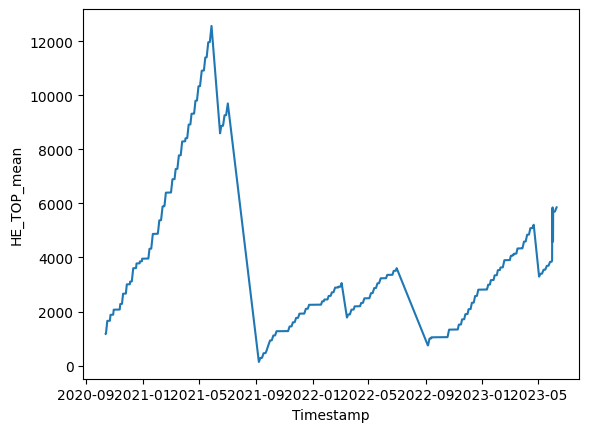

In [164]:
sns.lineplot(df_full["HE_TOP_mean"])

In [166]:
df_full.to_excel("!important_input_files/rdy_for_stats_121020_090623_1h_freq.xlsx")